<a href="https://colab.research.google.com/github/zahra-0201/Machine-Learning/blob/main/tugas03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/SEMESTER 3/ML/tugas/tugas03"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(path + '/data/day.csv', sep=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df_clean = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [7]:
corr_matrix = df_clean.corr()

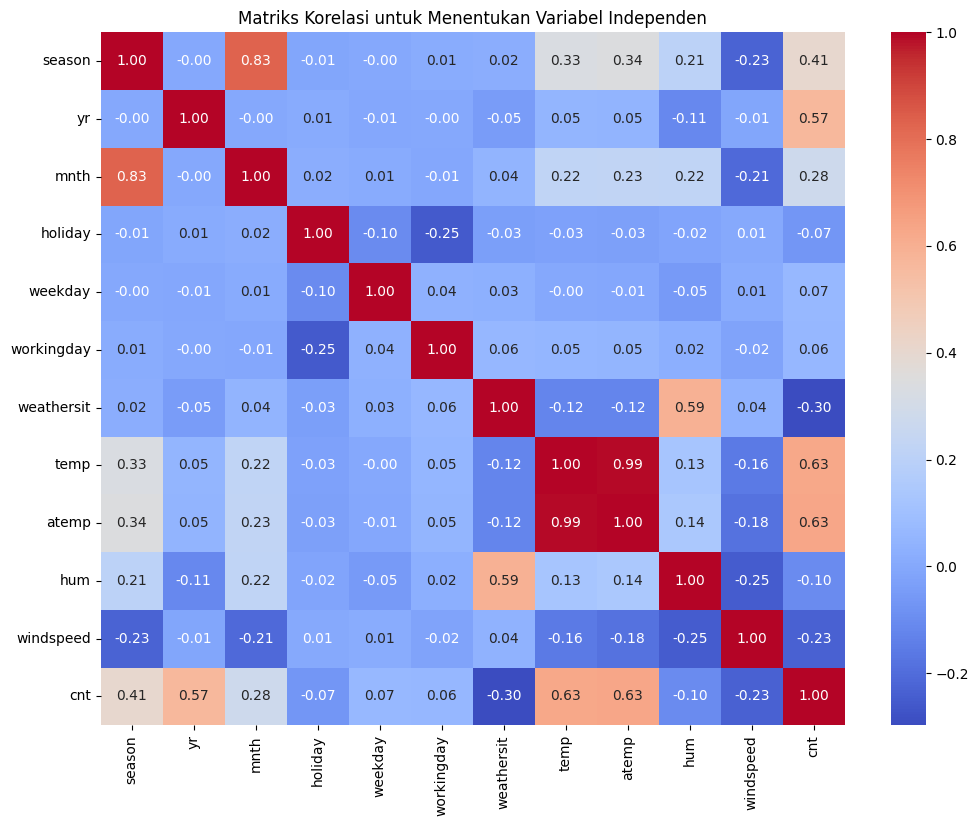

In [8]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi untuk Menentukan Variabel Independen')
plt.show()

In [9]:
X = df_clean[['atemp', 'yr', 'season']]
y = df_clean['cnt']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}\n")

Jumlah data train: 584
Jumlah data test: 147



In [11]:
X_train_const = sm.add_constant(X_train)

In [12]:
model = sm.OLS(y_train, X_train_const).fit()

In [13]:
print("--- Ringkasan Hasil Regresi OLS ---")
print(model.summary())

--- Ringkasan Hasil Regresi OLS ---
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     508.0
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          8.45e-162
Time:                        14:19:23   Log-Likelihood:                -4865.8
No. Observations:                 584   AIC:                             9740.
Df Residuals:                     580   BIC:                             9757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -522

In [14]:
const = model.params['const']
coef_atemp = model.params['atemp']
coef_yr = model.params['yr']
coef_season = model.params['season']

In [15]:
print("--- Persamaan Regresi ---")
print(f"cnt = {const:.2f} + ({coef_atemp:.2f} * atemp) + ({coef_yr:.2f} * yr) + ({coef_season:.2f} * season)\n")

--- Persamaan Regresi ---
cnt = -522.07 + (6292.59 * atemp) + (2068.68 * yr) + (400.81 * season)



In [16]:
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

In [17]:
hasil = pd.DataFrame({
    'cnt_aktual': y_test,
    'cnt_prediksi': y_pred_test
})

In [18]:
hasil['selisih_error'] = hasil['cnt_prediksi'] - hasil['cnt_aktual']
denom = hasil['cnt_aktual'].replace(0, np.nan) # Menghindari pembagian dengan nol
hasil['akurasi(%)'] = (1 - (hasil['selisih_error'].abs() / denom)).clip(lower=0, upper=1) * 100

print("--- Hasil Prediksi pada Data Test ---")
print(hasil.head())

--- Hasil Prediksi pada Data Test ---
     cnt_aktual  cnt_prediksi  selisih_error  akurasi(%)
703        6606   6101.416741    -504.583259   92.361743
33         1550    998.055136    -551.944864   64.390654
300        3747   3087.321994    -659.678006   82.394502
456        6041   4974.050196   -1066.949804   82.338192
633        7538   6574.147471    -963.852529   87.213418
